In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data

In [2]:

df = pd.read_csv(r"C:\Users\JOO SEOK HWANG\Documents\Study\EGN5442 programming\Project3\new_train_EGN5442.csv", index_col=0)
df.head()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x23,x24,x25,x26,x28,x29,x30,x31,x4,x6
0,1,#54359,Female,50,5,5,5,4,3,5,...,21,12.0,D_C,Bt,1,(192&&),NaN,2.380952,4,50
1,1,#84649,Female,44,1,1,1,1,3,3,...,0,0.0,L_C,Bt,1,(1034&&),NaN,inf,4,44
2,0,#59015,Female,72,3,1,5,5,3,2,...,0,8.0,L_C,Bt,3,(1452&&),NaN,inf,4,72
3,0,#99990,Female,38,1,3,1,3,5,1,...,0,0.0,L_C,PT,3,(916&&),NaN,inf,4,38
4,1,#83569,Male,37,5,5,5,5,2,5,...,0,0.0,L_C,Bt,1,(390&&),NaN,inf,4,37


In [3]:
df.apply(pd.unique)

y                                                 [1, 0]
x2     [#54359, #84649, #59015, #99990, #83569, #91, ...
x3                                        [Female, Male]
x5     [50, 44, 72, 38, 37, 41, 11, 58, 12, 22, 28, 4...
x9                                    [5, 1, 3, 2, 4, 0]
x10                                   [5, 1, 3, 2, 4, 0]
x11                                   [5, 1, 2, 0, 3, 4]
x12                                   [4, 1, 5, 3, 2, 0]
x13                                   [3, 5, 2, 1, 4, 0]
x14                                   [5, 3, 2, 1,  , 4]
x15                                   [3, 1, 2, 5, 4, 0]
x16                                   [3, 4, 5, 2, 1, 0]
x17                                   [4, 3, 2, 5, 1, 0]
x18                                   [5, 4, 3, 2, 1, 0]
x19                                      [5, 4, 3, 2, 1]
x20                                   [3, 4, 1, 2, 5, 0]
x21                                   [4, 3, 5, 1, 2, 0]
x22                            

## 2. Drop single entity columns

In [4]:
df = df.drop(columns=["x4", "x30"])

## 3. Convert string data to numerical data

In [5]:
# col x2, x29: get numbers from string
df.x2 = df.apply(lambda x: int(x.x2[1:]), axis=1)
df.x29 = df.apply(lambda x: int(x.x29[1:-3]), axis=1)

# col x3: Male -> 0, Female -> 1
df.x3 = df.apply(lambda x: 0 if x.x3 == "Male" else 1, axis=1)
df.rename(columns={"x3":"sex"})

# col x25, x26: convert data to binary format(0, 1)
df.x25 = df.apply(lambda x: 1 if x.x25 == "D_C" else 0, axis=1)
df.x26 = df.apply(lambda x: 1 if x.x26 == "Bt" else 0, axis=1)

df.head()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x21,x22,x23,x24,x25,x26,x28,x29,x31,x6
0,1,54359,1,50,5,5,5,4,3,5,...,4,3,21,12.0,1,1,1,192,2.380952,50
1,1,84649,1,44,1,1,1,1,3,3,...,4,2,0,0.0,0,1,1,1034,inf,44
2,0,59015,1,72,3,1,5,5,3,2,...,3,2,0,8.0,0,1,3,1452,inf,72
3,0,99990,1,38,1,3,1,3,5,1,...,4,5,0,0.0,0,0,3,916,inf,38
4,1,83569,0,37,5,5,5,5,2,5,...,4,5,0,0.0,0,1,1,390,inf,37


## 4. Drop rows

1) Drop empty data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104722 entries, 0 to 104721
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       104722 non-null  int64  
 1   x2      104722 non-null  int64  
 2   x3      104722 non-null  int64  
 3   x5      104722 non-null  int64  
 4   x9      104722 non-null  int64  
 5   x10     104722 non-null  int64  
 6   x11     104722 non-null  int64  
 7   x12     104722 non-null  int64  
 8   x13     104722 non-null  int64  
 9   x14     104722 non-null  object 
 10  x15     104722 non-null  int64  
 11  x16     104722 non-null  int64  
 12  x17     104722 non-null  int64  
 13  x18     104722 non-null  int64  
 14  x19     104722 non-null  int64  
 15  x20     104722 non-null  int64  
 16  x21     104722 non-null  int64  
 17  x22     104722 non-null  int64  
 18  x23     104722 non-null  int64  
 19  x24     104410 non-null  float64
 20  x25     104722 non-null  int64  
 21  x26     104722 

In [7]:
df[["x14"]].value_counts()

x14
4      30902
3      22030
5      20794
2      17712
1      10813
        2471
Name: count, dtype: int64

In [8]:
# col x14 has " "s and they makes the col's datatype object. 
# Therefore, change " "s to None, and drop None rows and set datatype to int.
df[["x14"]] = df[["x14"]].replace(" ", None)
df = df.dropna(subset=["x14"])
df.x14 = df.x14.astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102251 entries, 0 to 104721
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       102251 non-null  int64  
 1   x2      102251 non-null  int64  
 2   x3      102251 non-null  int64  
 3   x5      102251 non-null  int64  
 4   x9      102251 non-null  int64  
 5   x10     102251 non-null  int64  
 6   x11     102251 non-null  int64  
 7   x12     102251 non-null  int64  
 8   x13     102251 non-null  int64  
 9   x14     102251 non-null  int64  
 10  x15     102251 non-null  int64  
 11  x16     102251 non-null  int64  
 12  x17     102251 non-null  int64  
 13  x18     102251 non-null  int64  
 14  x19     102251 non-null  int64  
 15  x20     102251 non-null  int64  
 16  x21     102251 non-null  int64  
 17  x22     102251 non-null  int64  
 18  x23     102251 non-null  int64  
 19  x24     101947 non-null  float64
 20  x25     102251 non-null  int64  
 21  x26     102251 

In [10]:
# col x24 has nans so drop those rows
df = df.dropna(subset=["x24"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101947 entries, 0 to 104721
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       101947 non-null  int64  
 1   x2      101947 non-null  int64  
 2   x3      101947 non-null  int64  
 3   x5      101947 non-null  int64  
 4   x9      101947 non-null  int64  
 5   x10     101947 non-null  int64  
 6   x11     101947 non-null  int64  
 7   x12     101947 non-null  int64  
 8   x13     101947 non-null  int64  
 9   x14     101947 non-null  int64  
 10  x15     101947 non-null  int64  
 11  x16     101947 non-null  int64  
 12  x17     101947 non-null  int64  
 13  x18     101947 non-null  int64  
 14  x19     101947 non-null  int64  
 15  x20     101947 non-null  int64  
 16  x21     101947 non-null  int64  
 17  x22     101947 non-null  int64  
 18  x23     101947 non-null  int64  
 19  x24     101947 non-null  float64
 20  x25     101947 non-null  int64  
 21  x26     101947 

2. Drop dupicates 

In [11]:
df.drop_duplicates(keep="first", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101174 entries, 0 to 104721
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       101174 non-null  int64  
 1   x2      101174 non-null  int64  
 2   x3      101174 non-null  int64  
 3   x5      101174 non-null  int64  
 4   x9      101174 non-null  int64  
 5   x10     101174 non-null  int64  
 6   x11     101174 non-null  int64  
 7   x12     101174 non-null  int64  
 8   x13     101174 non-null  int64  
 9   x14     101174 non-null  int64  
 10  x15     101174 non-null  int64  
 11  x16     101174 non-null  int64  
 12  x17     101174 non-null  int64  
 13  x18     101174 non-null  int64  
 14  x19     101174 non-null  int64  
 15  x20     101174 non-null  int64  
 16  x21     101174 non-null  int64  
 17  x22     101174 non-null  int64  
 18  x23     101174 non-null  int64  
 19  x24     101174 non-null  float64
 20  x25     101174 non-null  int64  
 21  x26     101174 

In [12]:
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x21,x22,x23,x24,x25,x26,x28,x29,x31,x6
0,1,54359,1,50,5,5,5,4,3,5,...,4,3,21,12.0,1,1,1,192,2.380952,50
1,1,84649,1,44,1,1,1,1,3,3,...,4,2,0,0.0,0,1,1,1034,inf,44
2,0,59015,1,72,3,1,5,5,3,2,...,3,2,0,8.0,0,1,3,1452,inf,72
3,0,99990,1,38,1,3,1,3,5,1,...,4,5,0,0.0,0,0,3,916,inf,38
4,1,83569,0,37,5,5,5,5,2,5,...,4,5,0,0.0,0,1,1,390,inf,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,0,27,5,5,5,5,5,5,...,5,5,70,38.0,0,1,1,1371,0.385714,27
104718,0,23530,1,62,1,4,4,4,4,2,...,1,3,6,33.0,0,1,2,1703,10.333333,62
104719,0,88477,0,45,3,4,3,5,1,3,...,4,1,16,7.0,0,0,3,562,2.812500,45
104720,0,17164,0,57,2,4,2,2,4,2,...,3,4,0,0.0,0,0,2,315,inf,57


## 5. Change infinities

In [13]:
df.x31.value_counts()

x31
inf         57066
2.000000      387
1.000000      366
4.000000      320
3.000000      315
            ...  
0.132597        1
0.287958        1
0.261146        1
0.638554        1
0.570000        1
Name: count, Length: 5510, dtype: int64

In [14]:
# col x31 has inf and relatively values. 
# At first, I consider change infs to 100000 so that they can act like infinity. 
# However, for more normalized data, it is better to change them to 10.

df.loc[:,"x31"] = df.x31.replace(float("inf"), None)
df.loc[:,"x31"] = df.x31.fillna(100000)
df.x31.value_counts()

C:\Users\JOO SEOK HWANG\AppData\Local\Temp\ipykernel_19444\2607806519.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.380952380952381 None None ... 2.8125 None 1.0535714285714286]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:,"x31"] = df.x31.replace(float("inf"), None)
C:\Users\JOO SEOK HWANG\AppData\Local\Temp\ipykernel_19444\2607806519.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:,"x31"] = df.x31.fillna(100000)


x31
100000.000000    57066
2.000000           387
1.000000           366
4.000000           320
3.000000           315
                 ...  
0.132597             1
0.287958             1
0.261146             1
0.638554             1
0.570000             1
Name: count, Length: 5510, dtype: int64

In [15]:
# 100000 to 10
df.loc[:,"x31"] = df.x31.replace(100000, 10)
df.x31.value_counts()

C:\Users\JOO SEOK HWANG\AppData\Local\Temp\ipykernel_19444\909230881.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:,"x31"] = df.x31.replace(100000, 10)


x31
10.000000    57287
2.000000       387
1.000000       366
4.000000       320
3.000000       315
             ...  
0.132597         1
0.287958         1
0.261146         1
0.638554         1
0.570000         1
Name: count, Length: 5509, dtype: int64

## 6. Check by correlation

In [16]:
df.corr()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x21,x22,x23,x24,x25,x26,x28,x29,x31,x6
y,1.000000,-0.003964,-0.013974,0.148634,0.319506,-0.044971,0.193084,0.001754,0.216139,0.565031,...,0.249191,0.314511,-0.048998,-0.055895,-0.206385,0.454498,-0.504333,0.306133,0.065568,0.148634
x2,-0.003964,1.000000,-0.003944,0.005177,-0.002848,0.000786,0.002201,0.004629,-0.002544,0.001161,...,-0.000201,-0.001534,-0.001035,-0.000374,-0.002483,-0.000068,-0.001610,0.003308,0.003302,0.005177
x3,-0.013974,-0.003944,1.000000,-0.004963,-0.010816,-0.006109,-0.013146,-0.000540,-0.005751,0.039150,...,-0.038722,-0.006674,-0.002528,-0.000389,0.029179,0.001248,0.011198,-0.008582,-0.001037,-0.004963
x5,0.148634,0.005177,-0.004963,1.000000,-0.005581,0.030698,-0.005633,-0.003933,0.021529,0.186381,...,-0.048534,0.051917,-0.012924,-0.015154,-0.279752,0.047569,-0.140328,0.093453,0.151422,1.000000
x9,0.319506,-0.002848,-0.010816,-0.005581,1.000000,0.345686,0.709020,0.347539,0.137966,0.427300,...,0.118501,0.133910,-0.023587,-0.025557,0.013548,0.104991,-0.026789,-0.007279,0.015215,-0.005581
x10,-0.044971,0.000786,-0.006109,0.030698,0.345686,1.000000,0.454238,0.459652,0.004316,0.056257,...,0.073529,0.013257,-0.000436,-0.002307,-0.193754,-0.254028,0.090334,-0.022160,0.002745,0.030698
x11,0.193084,0.002201,-0.013146,-0.005633,0.709020,0.454238,1.000000,0.482164,0.029206,0.332489,...,0.042112,0.009296,-0.013726,-0.015691,-0.003853,0.115470,-0.088121,0.040274,0.004049,-0.005633
x12,0.001754,0.004629,-0.000540,-0.003933,0.347539,0.459652,0.482164,1.000000,-0.001560,-0.003987,...,0.002123,-0.004616,0.005532,0.005226,0.007273,0.030613,-0.003339,0.003536,-0.007240,-0.003933
x13,0.216139,-0.002544,-0.005751,0.021529,0.137966,0.004316,0.029206,-0.001560,1.000000,0.249723,...,0.036046,0.649007,-0.031281,-0.033828,-0.060298,0.063274,-0.086773,0.056650,0.021848,0.021529
x14,0.565031,0.001161,0.039150,0.186381,0.427300,0.056257,0.332489,-0.003987,0.249723,1.000000,...,0.087956,0.351616,-0.029348,-0.033364,-0.182754,0.213613,-0.321275,0.196405,0.052909,0.186381


<Axes: >

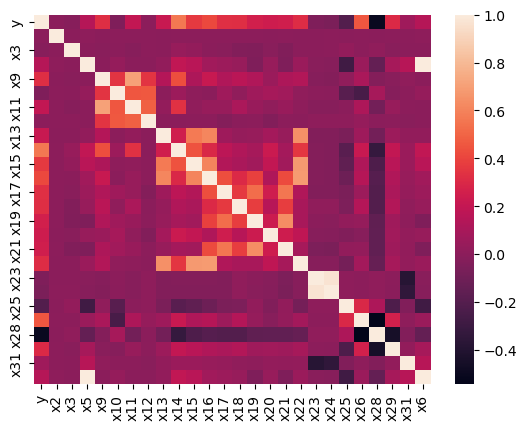

In [17]:
sns.heatmap(df.corr())

In [18]:
# col x5 and x6 are the same(1.0). col x23 and x24 has very hign correlation(0.966).
# Therefore drop x6 and x24.
df = df.drop(columns=["x6", "x24"])

In [19]:
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x19,x20,x21,x22,x23,x25,x26,x28,x29,x31
0,1,54359,1,50,5,5,5,4,3,5,...,5,3,4,3,21,1,1,1,192,2.380952
1,1,84649,1,44,1,1,1,1,3,3,...,4,4,4,2,0,0,1,1,1034,10.0
2,0,59015,1,72,3,1,5,5,3,2,...,3,1,3,2,0,0,1,3,1452,10.0
3,0,99990,1,38,1,3,1,3,5,1,...,4,1,4,5,0,0,0,3,916,10.0
4,1,83569,0,37,5,5,5,5,2,5,...,4,4,4,5,0,0,1,1,390,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,0,27,5,5,5,5,5,5,...,5,3,5,5,70,0,1,1,1371,0.385714
104718,0,23530,1,62,1,4,4,4,4,2,...,1,3,1,3,6,0,1,2,1703,10.333333
104719,0,88477,0,45,3,4,3,5,1,3,...,5,3,4,1,16,0,0,3,562,2.8125
104720,0,17164,0,57,2,4,2,2,4,2,...,5,2,3,4,0,0,0,2,315,10.0


<Axes: >

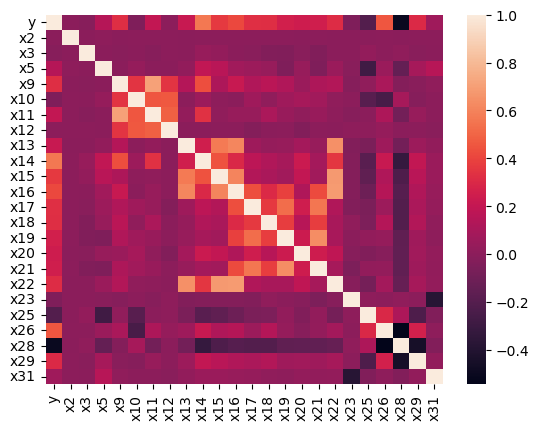

In [27]:
sns.heatmap(df.corr())

## 7. Normalization and export data

In [20]:
df.apply(pd.unique)

y                                                 [1, 0]
x2     [54359, 84649, 59015, 99990, 83569, 91, 19842,...
x3                                                [1, 0]
x5     [50, 44, 72, 38, 37, 41, 58, 12, 22, 28, 43, 4...
x9                                    [5, 1, 3, 2, 4, 0]
x10                                   [5, 1, 3, 2, 4, 0]
x11                                   [5, 1, 2, 3, 0, 4]
x12                                   [4, 1, 5, 3, 2, 0]
x13                                   [3, 5, 2, 1, 4, 0]
x14                                      [5, 3, 2, 1, 4]
x15                                   [3, 1, 2, 5, 4, 0]
x16                                   [3, 4, 5, 2, 1, 0]
x17                                   [4, 3, 2, 5, 1, 0]
x18                                   [5, 4, 3, 1, 2, 0]
x19                                      [5, 4, 3, 2, 1]
x20                                   [3, 4, 1, 2, 5, 0]
x21                                   [4, 3, 5, 1, 2, 0]
x22                            

In [21]:
df.describe()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x18,x19,x20,x21,x22,x23,x25,x26,x28,x29
count,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,...,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000,101174.000000
mean,0.430447,51950.870372,0.508816,39.621464,2.770218,3.072074,2.820932,2.979738,3.205201,3.328246,...,3.354716,3.629836,3.302479,3.637684,3.291488,14.884427,0.179028,0.695564,1.960326,1203.531807
std,0.495141,30003.337368,0.499925,15.054527,1.299793,1.509129,1.348707,1.279701,1.328795,1.267183,...,1.315320,1.180690,1.265151,1.176049,1.310897,38.434976,0.383378,0.460170,0.962939,1001.455704
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,31.000000
25%,0.000000,25956.250000,0.000000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,421.000000
50%,0.000000,51962.500000,1.000000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,2.000000,853.000000
75%,1.000000,77928.750000,1.000000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,0.000000,1.000000,3.000000,1749.000000
max,1.000000,103903.000000,1.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1.000000,1.000000,3.000000,4983.000000


In [22]:
# col x2, x23 and x29 have too wide range of data, normalized them
mean2 = df.x2.mean()
mean23 = df.x23.mean()
mean29 = df.x29.mean()
std2 = df.x2.std()
std23 = df.x23.std()
std29 = df.x29.std()

In [23]:
df.loc[:,"x2"] = (df.loc[:,"x2"] - mean2) / std2
df.loc[:,"x23"] = (df.loc[:,"x23"] - mean2) / std2
df.loc[:,"x29"] = (df.loc[:,"x29"] - mean2) / std2

C:\Users\JOO SEOK HWANG\AppData\Local\Temp\ipykernel_19444\2543871365.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.08026206  1.08981642  0.2354448  ...  1.21740222 -1.15943336
  1.39528244]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,"x2"] = (df.loc[:,"x2"] - mean2) / std2
C:\Users\JOO SEOK HWANG\AppData\Local\Temp\ipykernel_19444\2543871365.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.73080313 -1.73150306 -1.73150306 ... -1.73096978 -1.73150306
 -1.7296366 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,"x23"] = (df.loc[:,"x23"] - mean2) / std2
C:\Users\JOO SEOK HWANG\AppData\Local\Temp\ipykernel_19444\2543871365.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101174 entries, 0 to 104721
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       101174 non-null  int64  
 1   x2      101174 non-null  float64
 2   x3      101174 non-null  int64  
 3   x5      101174 non-null  int64  
 4   x9      101174 non-null  int64  
 5   x10     101174 non-null  int64  
 6   x11     101174 non-null  int64  
 7   x12     101174 non-null  int64  
 8   x13     101174 non-null  int64  
 9   x14     101174 non-null  int64  
 10  x15     101174 non-null  int64  
 11  x16     101174 non-null  int64  
 12  x17     101174 non-null  int64  
 13  x18     101174 non-null  int64  
 14  x19     101174 non-null  int64  
 15  x20     101174 non-null  int64  
 16  x21     101174 non-null  int64  
 17  x22     101174 non-null  int64  
 18  x23     101174 non-null  float64
 19  x25     101174 non-null  int64  
 20  x26     101174 non-null  int64  
 21  x28     101174 

In [25]:
df = df.reset_index(drop=True)

In [26]:
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x19,x20,x21,x22,x23,x25,x26,x28,x29,x31
0,1,0.080262,1,50,5,5,5,4,3,5,...,5,3,4,3,-1.730803,1,1,1,-1.725104,2.380952
1,1,1.089816,1,44,1,1,1,1,3,3,...,4,4,4,2,-1.731503,0,1,1,-1.697040,10.0
2,0,0.235445,1,72,3,1,5,5,3,2,...,3,1,3,2,-1.731503,0,1,3,-1.683108,10.0
3,0,1.601126,1,38,1,3,1,3,5,1,...,4,1,4,5,-1.731503,0,0,3,-1.700973,10.0
4,1,1.053820,0,37,5,5,5,5,2,5,...,4,4,4,5,-1.731503,0,1,1,-1.718505,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101169,1,-0.715516,0,27,5,5,5,5,5,5,...,5,3,5,5,-1.729170,0,1,1,-1.685808,0.385714
101170,0,-0.947257,1,62,1,4,4,4,4,2,...,1,3,1,3,-1.731303,0,1,2,-1.674743,10.333333
101171,0,1.217402,0,45,3,4,3,5,1,3,...,5,3,4,1,-1.730970,0,0,3,-1.712772,2.8125
101172,0,-1.159433,0,57,2,4,2,2,4,2,...,5,2,3,4,-1.731503,0,0,2,-1.721004,10.0


In [79]:
df.to_csv("cleaned_data_project3.csv")